# Trabalho 2
Descrição do trabalho:

https://web.tecgraf.puc-rio.br/~mgattass/visao/trb/T2.html

Aluno: Daniel da Silva Costa

E-mail: danieldasilvacosta@gmail.com

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import math

### Função

y = np.sin(np.pi\*x) - x\*\*3

In [2]:
num_points = 101

In [3]:
x = np.linspace( -1, 1, num_points )
y = np.sin( np.pi * x) - x**3

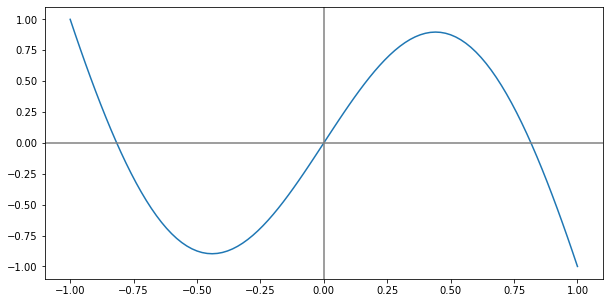

In [4]:
plt.figure( figsize = ( 10, 5 ) )
plt.plot( x, y )
plt.axhline( 0, color='gray')
plt.axvline( 0, color='gray')
plt.show()

### Solução por Mínimos Quadrados

In [5]:
sx = sx2 = sx3 = sx4 = sx5 = sx6 = sy = sxy = sx2y = sx3y = 0
n = x.shape[0]

for i in range(n):

    sx += x[i]
    sx2 += x[i]**2
    sx3 += x[i]**3
    sx4 += x[i]**4
    sx5 += x[i]**5
    sx6 += x[i]**6
    sy += y[i]
    sxy += x[i] * y[i]
    sx2y += (x[i]**2) * y[i]
    sx3y += (x[i]**3) * y[i]

In [6]:
# Baseado em https://pythonnumericalmethods.berkeley.edu/notebooks/chapter14.05-Solve-Systems-of-Linear-Equations-in-Python.html

A = np.array([[n, sx, sx2, sx3], 
              [sx, sx2, sx3, sx4], 
              [sx2, sx3, sx4, sx5],
              [sx3, sx4, sx5, sx6]])
k = np.array([sy, sxy, sx2y, sx3y])

coeficientes = np.linalg.solve(A, k)
print(coeficientes)

[ 5.06881631e-16  2.67745434e+00 -8.46353766e-16 -3.86119611e+00]



Função aproximada: 0.000 + 2.677 x + -0.000 x^2 + -3.861 x^3



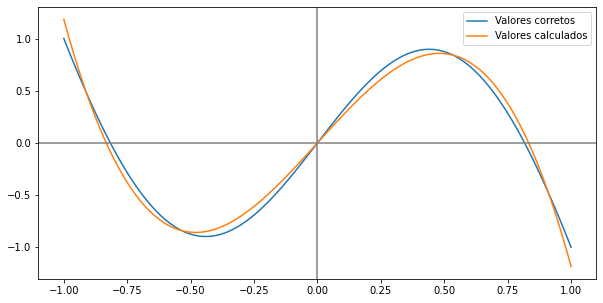

In [7]:
a = coeficientes[0]
b = coeficientes[1]
c = coeficientes[2]
d = coeficientes[3]

y_novo = a + b * x + c * (x**2) + d * x**3

print()
print( f'Função aproximada: {a:.3f} + {b:.3f} x + {c:.3f} x^2 + {d:.3f} x^3' )
print()

plt.figure( figsize=(10, 5) )
plt.plot( x, y, label='Valores corretos' )
plt.plot( x, y_novo, label='Valores calculados' )
plt.axhline( 0, color='gray')
plt.axvline( 0, color='gray')
plt.legend()
plt.show()

In [8]:
''' Pytorch (autograd) (Calculado mais abaixo)

Solução a = -0.000
Solução b = 2.677
Solução c = 0.000
Solução d = -3.861
'''

' Pytorch (autograd) (Calculado mais abaixo)\n\nSolução a = -0.000\nSolução b = 2.677\nSolução c = 0.000\nSolução d = -3.861\n'

### Gradiente Descendente

In [9]:
def calcula_erro( a, b, c, d ):

    soma = 0.0
    n = x.shape[0]
    for i in range(n):

        e = y[i] - ( a + b*x[i] + c*(x[i]**2) + d*(x[i]**3) )
        soma += e * e

    # return soma/n
    return soma

In [10]:
# a = np.random.rand()
# b = np.random.rand()
# c = np.random.rand()
# d = np.random.rand()

a = 0.0
b = 0.0
c = 0.0
d = 0.0

print( f'a: {a}' )
print( f'b: {b}' )
print( f'c: {c}' )
print( f'd: {d}' )

a: 0.0
b: 0.0
c: 0.0
d: 0.0


In [11]:
err = calcula_erro( a, b, c, d )
err

40.366518517429704

In [12]:
# Baseado em https://pytorch.org/tutorials/beginner/pytorch_with_examples.html

def grad_desc( a0, b0, c0, d0, tol, max_it, learning_rate ):

    erro0 = calcula_erro( a0, b0, c0, d0 )
    erros = [erro0]

    for t in range(max_it):
      
        # Forward pass: compute predicted y
        y_pred = a0 + b0 * x + c0 * x ** 2 + d0 * x ** 3

        # Compute and print loss
        loss = calcula_erro( a0, b0, c0, d0 )

        # Backprop to compute gradients of a, b, c, d with respect to loss
        grad_y_pred = 2.0 * (y_pred - y)
        grad_a = grad_y_pred.sum()
        grad_b = (grad_y_pred * x).sum()
        grad_c = (grad_y_pred * x ** 2).sum()
        grad_d = (grad_y_pred * x ** 3).sum()

        # Update weights
        a1 = a0 - learning_rate * grad_a
        b1 = b0 - learning_rate * grad_b
        c1 = c0 - learning_rate * grad_c
        d1 = d0 - learning_rate * grad_d

        a0 = a1
        b0 = b1
        c0 = c1
        d0 = d1

        erro1 = calcula_erro( a1, b1, c1, d1 )
        erros.append( erro1 )

    print( f'Solução a = {a1:.3f}' )
    print( f'Solução b = {b1:.3f}' )
    print( f'Solução c = {c1:.3f}' )
    print( f'Solução d = {d1:.3f}' )

    return a1, b1, c1, d1, np.array(erros)

Solução a = 0.000
Solução b = 2.677
Solução c = -0.000
Solução d = -3.861


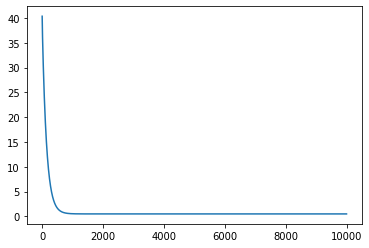

CPU times: user 6.96 s, sys: 45.6 ms, total: 7 s
Wall time: 9.16 s


In [13]:
%%time

a_gd, b_gd, c_gd, d_gd, erros = grad_desc(a0 = a,
                                          b0 = b, 
                                          c0 = c, 
                                          d0 = d, 
                                          tol = 1e-5, 
                                          max_it = 10000, 
                                          learning_rate = 0.001)

interacao = np.linspace( 0, erros.shape[0] - 1, erros.shape[0] )
plt.plot( interacao, erros )
plt.show()

In [14]:
''' Pytorch (autograd) (Calculado mais abaixo)

Solução a = -0.000
Solução b = 2.677
Solução c = 0.000
Solução d = -3.861
'''

' Pytorch (autograd) (Calculado mais abaixo)\n\nSolução a = -0.000\nSolução b = 2.677\nSolução c = 0.000\nSolução d = -3.861\n'


Função aproximada: 0.000 + 2.677 x + -0.000 x^2 + -3.861 x^3



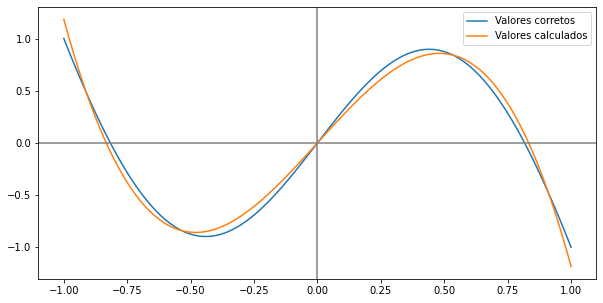

In [15]:
y_novo = a_gd + b_gd * x + c_gd * (x**2) + d_gd * x**3

print()
print( f'Função aproximada: {a_gd:.3f} + {b_gd:.3f} x + {c_gd:.3f} x^2 + {d_gd:.3f} x^3' )
print()

plt.figure( figsize=(10, 5) )
plt.plot( x, y, label='Valores corretos' )
plt.plot( x, y_novo, label='Valores calculados' )
plt.axhline( 0, color='gray')
plt.axvline( 0, color='gray')
plt.legend()
plt.show()

### Pytorch (autograd)

In [16]:
x = torch.linspace( -1, 1, num_points, dtype=torch.float )
y = torch.sin( np.pi * x) - x**3

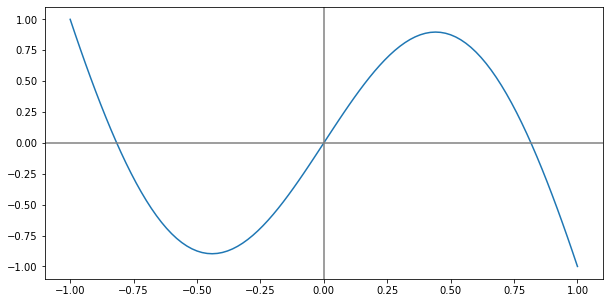

In [17]:
plt.figure( figsize = ( 10, 5 ) )
plt.plot( x, y )
plt.axhline( 0, color='gray')
plt.axvline( 0, color='gray')
plt.show()

a (inicial): 0.000
b (inicial): 0.000
c (inicial): 0.000
d (inicial): 0.000

Solução a = -0.000
Solução b = 2.677
Solução c = 0.000
Solução d = -3.861


Função aproximada: -0.000 + 2.677 x + 0.000 x^2 + -3.861 x^3



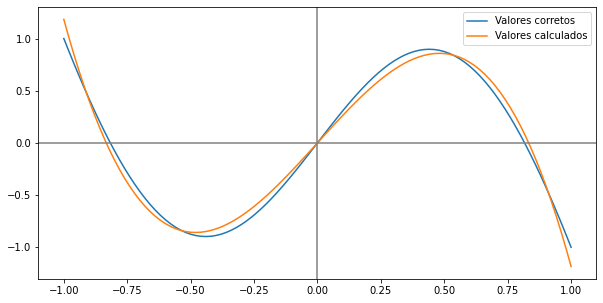

CPU times: user 4.06 s, sys: 70.7 ms, total: 4.13 s
Wall time: 5.8 s


In [18]:
%%time

learning_rate = 0.001
iteracoes = 10000

# a = torch.rand( (), dtype=torch.float, requires_grad=True )
# b = torch.rand( (), dtype=torch.float, requires_grad=True )
# c = torch.rand( (), dtype=torch.float, requires_grad=True )
# d = torch.rand( (), dtype=torch.float, requires_grad=True )

a = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)
b = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)
c = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)
d = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

print( f'a (inicial): {a:.3f}' )
print( f'b (inicial): {b:.3f}' )
print( f'c (inicial): {c:.3f}' )
print( f'd (inicial): {d:.3f}' )

def forward(x):
    return a + b*x + c*(x**2) + d*(x**3)

def loss(y, y_pred):
    return (y - y_pred).pow(2).sum()
    # return (y - y_pred).pow(2).sum() / len(y)

for iteracao in range(0, iteracoes):

    y_pred = forward(x)

    l = loss(y, y_pred)
    
    # Calcular os gradientes de forma automática usando o PyTorch (autograd)
    l.backward()

    with torch.no_grad():

        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

    a.grad.zero_()
    b.grad.zero_()
    c.grad.zero_()
    d.grad.zero_()

    # if iteracao % 20 == 0:
    #     print(f'iteracao {iteracao}')
    #     print(f'loss = {l.item():.8f}')
    #     print()
    #     print(f'a = {a.item():.3f}')
    #     print(f'b = {b.item():.3f}')
    #     print(f'c = {c.item():.3f}')
    #     print(f'd = {d.item():.3f}')
    #     print()
    #     print( '------------------------------' )
    #     print()

print()
print( f'Solução a = {a.item():.3f}' )
print( f'Solução b = {b.item():.3f}' )
print( f'Solução c = {c.item():.3f}' )
print( f'Solução d = {d.item():.3f}' )
print()

y_novo = a.item() + b.item() * x + c.item() * (x**2) + d.item() * x**3

print()
print( f'Função aproximada: {a.item():.3f} + {b.item():.3f} x + {c.item():.3f} x^2 + {d.item():.3f} x^3' )
print()

plt.figure( figsize=(10, 5) )
plt.plot( x, y, label='Valores corretos' )
plt.plot( x, y_novo, label='Valores calculados' )
plt.axhline( 0, color='gray')
plt.axvline( 0, color='gray')
plt.legend()
plt.show()